# Criando os nomes

In [ ]:
import pandas as pd

In [ ]:
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=f')
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
5,JULIANA,0,562589,6,F
6,MARCIA,0,551855,7,F
7,FERNANDA,0,531607,8,F
8,PATRICIA,0,529446,9,F
9,ALINE,0,509869,10,F


In [ ]:
nomes_m = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=20&sexo=m")
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
5,PAULO,0,1417907,6,M
6,PEDRO,0,1213557,7,M
7,LUCAS,0,1116818,8,M
8,LUIZ,0,1102927,9,M
9,MARCOS,0,1101126,10,M


In [ ]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
19,MARIANA,0,381778,20,F
9,ALINE,0,509869,10,F
11,CAMILA,0,469851,12,F
5,JULIANA,0,562589,6,F
14,JESSICA,0,456472,15,F


In [ ]:
nomes_m.sample(5)

,nome,regiao,freq,rank,sexo
9,MARCOS,0,1101126,10,M
2,ANTONIO,0,2567494,3,M
4,CARLOS,0,1483121,5,M
11,GABRIEL,0,922744,12,M
8,LUIZ,0,1102927,9,M


In [ ]:
print('Quantidade de nomes: ' + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 40


In [ ]:
frames = [nomes_f, nomes_m]

In [ ]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
6,MARCIA
15,BRUNO
13,DANIEL
14,JESSICA
16,EDUARDO


# Incluindo ID dos alunos

In [ ]:
import numpy as np
np.random.seed(123)

In [ ]:
total_alunos = len(nomes)
total_alunos

40

In [ ]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [ ]:
nomes.sample(3)

,nome,id_aluno
10,LUIS,12
16,EDUARDO,35
11,GABRIEL,1


In [ ]:
dominios = ['@dominioemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio
4,ADRIANA,29,@servicodoemail.com
0,MARIA,9,@servicodoemail.com
13,DANIEL,4,@dominioemail.com.br
15,LETICIA,15,@dominioemail.com.br
11,CAMILA,18,@dominioemail.com.br


In [ ]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
7,FERNANDA,38,@dominioemail.com.br,fernanda@dominioemail.com.br
12,RAFAEL,6,@servicodoemail.com,rafael@servicodoemail.com
11,GABRIEL,1,@dominioemail.com.br,gabriel@dominioemail.com.br
17,LUCIANA,17,@dominioemail.com.br,luciana@dominioemail.com.br
13,BRUNA,8,@dominioemail.com.br,bruna@dominioemail.com.br


# Criando a tabela cursos

In [ ]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import html5lib

In [ ]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [ ]:
type(cursos)

list

In [ ]:
cursos = cursos[0]

In [ ]:
type(cursos)

pandas.core.frame.DataFrame

In [ ]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


# Alterando o index de cursos

In [ ]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})
cursos.head(2)

,nome_do_curso
0,Lógica de programação
1,Java para Web


In [ ]:
cursos['id'] = cursos.index + 1
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [ ]:
cursos = cursos.set_index('id')
cursos.head(10)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


# Matriculando os alunos nos cursos

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email
11,CAMILA,18,@dominioemail.com.br,camila@dominioemail.com.br
17,LUCIANA,17,@dominioemail.com.br,luciana@dominioemail.com.br
10,LUIS,12,@dominioemail.com.br,luis@dominioemail.com.br
5,PAULO,14,@dominioemail.com.br,paulo@dominioemail.com.br
9,MARCOS,3,@servicodoemail.com,marcos@servicodoemail.com


In [ ]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos) * 1.5).astype(int)

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
6,PEDRO,23,@servicodoemail.com,pedro@servicodoemail.com,1
15,LETICIA,15,@dominioemail.com.br,leticia@dominioemail.com.br,1
1,ANA,36,@dominioemail.com.br,ana@dominioemail.com.br,1
17,FELIPE,28,@servicodoemail.com,felipe@servicodoemail.com,3
3,FRANCISCO,5,@servicodoemail.com,francisco@servicodoemail.com,2


In [ ]:
nomes.matriculas.describe()

count    40.00000
mean      1.95000
std       1.15359
min       1.00000
25%       1.00000
50%       2.00000
75%       3.00000
max       5.00000
Name: matriculas, dtype: float64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


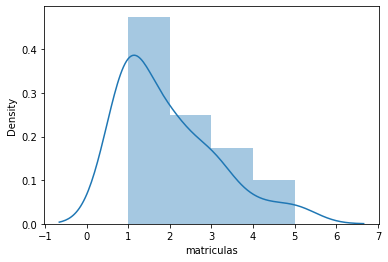

In [ ]:
sns.distplot(nomes.matriculas)

In [ ]:
nomes.matriculas.value_counts()

1    19
2    10
3     7
4     2
5     2
Name: matriculas, dtype: int64

In [ ]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
2,FRANCISCA,21,@servicodoemail.com,francisca@servicodoemail.com,4
18,VANESSA,26,@servicodoemail.com,vanessa@servicodoemail.com,1
15,LETICIA,15,@dominioemail.com.br,leticia@dominioemail.com.br,1
11,GABRIEL,1,@dominioemail.com.br,gabriel@dominioemail.com.br,1
13,BRUNA,8,@dominioemail.com.br,bruna@dominioemail.com.br,1


# Selecionando cursos

In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
17,LUCIANA,17,@dominioemail.com.br,luciana@dominioemail.com.br,1
13,DANIEL,4,@dominioemail.com.br,daniel@dominioemail.com.br,1
9,MARCOS,3,@servicodoemail.com,marcos@servicodoemail.com,1


In [ ]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [ ]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [ ]:
matriculas.head()

,id_aluno,id_curso
0,9,6
1,36,12
2,21,10
3,21,1
4,21,9


In [ ]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,5,Lógica de programação
3,5,C# para Web
4,3,Ruby on Rails
5,2,Cursos de Python
6,4,PHP com MySql
7,6,.NET para web
8,8,Novas integrações com Java
9,3,TDD com Java
10,5,Código limpo com C#


In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
5,PAULO,14,@dominioemail.com.br,paulo@dominioemail.com.br,2
6,PEDRO,23,@servicodoemail.com,pedro@servicodoemail.com,1
5,JULIANA,30,@servicodoemail.com,juliana@servicodoemail.com,5


In [ ]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [ ]:
matriculas.head()

,id_aluno,id_curso
0,9,6
1,36,12
2,21,10
3,21,1
4,21,9


In [ ]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_de_alunos'})

In [ ]:
matriculas_por_curso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,5,Lógica de programação
3,5,C# para Web
4,3,Ruby on Rails
5,2,Cursos de Python
6,4,PHP com MySql


# Saída em diferentes formatos

In [ ]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,5,Lógica de programação
3,5,C# para Web
4,3,Ruby on Rails


In [ ]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [ ]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_de_alunos,nome_do_curso
0,5,Lógica de programação
1,5,C# para Web
2,3,Ruby on Rails
3,2,Cursos de Python
4,4,PHP com MySql
5,6,.NET para web
6,8,Novas integrações com Java
7,3,TDD com Java
8,5,Código limpo com C#
9,2,Hardware básico


In [ ]:
matriculas_json = matriculas_por_curso.to_json()
matriculas_json

'{"quantidade_de_alunos":{"1":5,"3":5,"4":3,"5":2,"6":4,"7":6,"8":8,"9":3,"10":5,"12":2,"13":3,"16":10,"17":4,"18":3,"19":8,"20":7},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [ ]:
matriculas_html = matriculas_por_curso.to_html()
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>5</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>3</th>
      <td>5</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>3</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>2</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>4</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>6</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>8</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>3</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>5</td>
      <td

# Criando o banco SQL

In [ ]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect # adicionando o método inspect

In [ ]:
engine = create_engine('sqlite:///:memory:')
engine

Engine(sqlite:///:memory:)

In [ ]:
type(engine)

sqlalchemy.engine.base.Engine

In [ ]:
matriculas_por_curso.head(3)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,5,Lógica de programação
3,5,C# para Web
4,3,Ruby on Rails


In [ ]:
matriculas_por_curso.to_sql('matriculas', engine)

In [ ]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando no banco

In [ ]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [ ]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,5,Lógica de programação
1,3,5,C# para Web
2,4,3,Ruby on Rails
3,5,2,Cursos de Python
4,6,4,PHP com MySql
5,7,6,.NET para web
6,8,8,Novas integrações com Java
7,9,3,TDD com Java
8,10,5,Código limpo com C#
9,12,2,Hardware básico


In [ ]:
pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,5
1,C# para Web,5
2,Ruby on Rails,3
3,Cursos de Python,2
4,PHP com MySql,4
5,.NET para web,6
6,Novas integrações com Java,8
7,TDD com Java,3
8,Código limpo com C#,5
9,Hardware básico,2


In [ ]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [ ]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 5')

In [ ]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
5,.NET para web,6
6,Novas integrações com Java,8
11,Estatística básica,10
14,Boas práticas em Java,8
15,Orientação objetos com Java,7


# Escrevendo no banco

In [ ]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [ ]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes da próxima turma

In [ ]:
matriculas_por_curso.head(10)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,5,Lógica de programação
3,5,C# para Web
4,3,Ruby on Rails
5,2,Cursos de Python
6,4,PHP com MySql
7,6,.NET para web
8,8,Novas integrações com Java
9,3,TDD com Java
10,5,Código limpo com C#


In [ ]:
matriculas

,id_aluno,id_curso
0,9,6
1,36,12
2,21,10
3,21,1
4,21,9
...,...,...
73,28,20
74,28,19
75,31,8
76,31,7


In [ ]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
7,32,16
15,30,16
19,2,16
20,25,16
27,15,16
29,20,16
31,26,16
35,37,16
41,5,16
54,27,16


In [ ]:
nomes.sample(3)

,nome,id_aluno,dominio,email,matriculas
8,LUIZ,27,@dominioemail.com.br,luiz@dominioemail.com.br,3
9,MARCOS,3,@servicodoemail.com,marcos@servicodoemail.com,1
6,PEDRO,23,@servicodoemail.com,pedro@servicodoemail.com,1


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
32,16,ANTONIA,@servicodoemail.com,antonia@servicodoemail.com,3
30,16,JULIANA,@servicodoemail.com,juliana@servicodoemail.com,5
2,16,ALINE,@servicodoemail.com,aline@servicodoemail.com,1
25,16,SANDRA,@dominioemail.com.br,sandra@dominioemail.com.br,1
15,16,LETICIA,@dominioemail.com.br,leticia@dominioemail.com.br,1
20,16,JULIA,@servicodoemail.com,julia@servicodoemail.com,2
26,16,VANESSA,@servicodoemail.com,vanessa@servicodoemail.com,1
37,16,JOSE,@dominioemail.com.br,jose@dominioemail.com.br,2
5,16,FRANCISCO,@servicodoemail.com,francisco@servicodoemail.com,2


In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
32      ANTONIA
30      JULIANA
2         ALINE
25       SANDRA
15      LETICIA
20        JULIA
26      VANESSA
37         JOSE
5     FRANCISCO
27         LUIZ
Name: nome, dtype: object

In [ ]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
32,ANTONIA
30,JULIANA
2,ALINE
25,SANDRA
15,LETICIA
20,JULIA
26,VANESSA
37,JOSE
5,FRANCISCO


In [ ]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [ ]:
nome_curso = nome_curso.nome_do_curso
nome_curso

In [ ]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [ ]:
proxima_turma

,nome
id_aluno,
32,ANTONIA
30,JULIANA
2,ALINE
25,SANDRA
15,LETICIA
20,JULIA
26,VANESSA
37,JOSE
5,FRANCISCO


In [ ]:
proxima_turma = proxima_turma.rename(columns = {'nome': 'Alunos do curso de {}'.format(nome_curso)})

In [ ]:
proxima_turma.sample(3)

,Alunos do curso de Estatística básica
id_aluno,
26,VANESSA
15,LETICIA
5,FRANCISCO


#Excel

In [ ]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)

In [ ]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do curso de Estatística básica
0,ANTONIA
1,JULIANA
2,ALINE
3,SANDRA
4,LETICIA
5,JULIA
6,VANESSA
7,JOSE
8,FRANCISCO
9,LUIZ
